## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Importing Datasets

In [23]:
# Load the dataset
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   ...  svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0  ...                     221                  26                        24   
1  ...                     222                  26                        24   
2  ...                     222                  26                        27   
3  ...                     222                  26                        27   
4  ...                     222                  26                        24   

   svcscan.shared_process_services  svcscan.interactive_process_services  \
0                              116                                     0   
1                              118                                     0   
2                              118                                     0   
3                              118                                     0   
4                              118                                     0   

   svcscan.nactive  callbacks.ncallbacks  callbacks.nanonymous  \
0              121                    87                     0   
1              122                    87                     0   
2              120                    88                     0   
3              120                    88                     0   
4              124                    87                     0   

   callbacks.ngeneric   Class  
0                   8  Benign  
1                   8  Benign  
2                   8  Benign  
3                   8  Benign  
4                   8  Benign  

[5 rows x 57 columns]

## Data Description

In [24]:
# Display the columns
print(df.columns)

# Show summary statistics
print(df.describe())


Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

## Density-KDE Plot

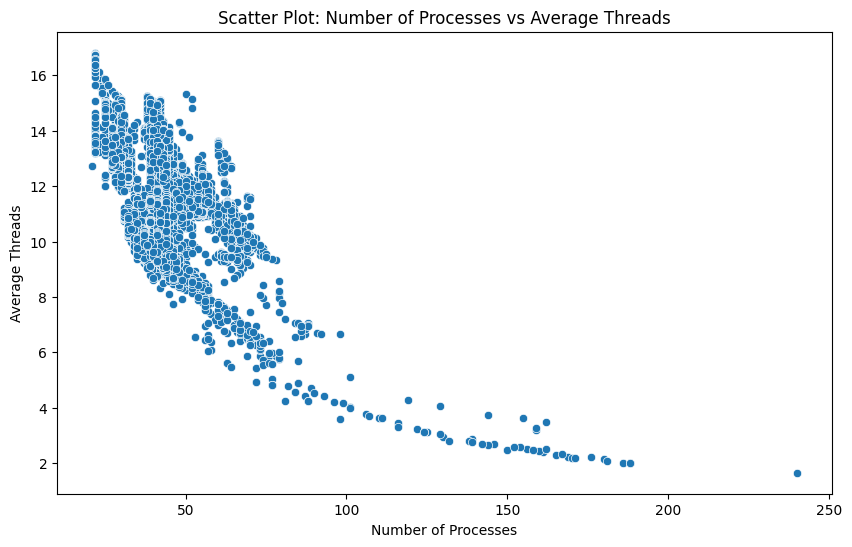

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot or Density-KDE plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pslist.nproc', y='pslist.avg_threads')
plt.xlabel('Number of Processes')
plt.ylabel('Average Threads')
plt.title('Scatter Plot: Number of Processes vs Average Threads')
plt.show()


## Data Preprocessing

In [26]:
df.isna()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0         False         False         False               False   
1         False         False         False               False   
2         False         False         False               False   
3         False         False         False               False   
4         False         False         False               False   
...         ...           ...           ...                 ...   
58591     False         False         False               False   
58592     False         False         False               False   
58593     False         False         False               False   
58594     False         False         False               False   
58595     False         False         False               False   

       pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   False                False          False   
1                   False                False          False   
2                   False                False          False   
3                   False                False          False   
4                   False                False          False   
...                   ...                  ...            ...   
58591               False                False          False   
58592               False                False          False   
58593               False                False          False   
58594               False                False          False   
58595               False                False          False   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
0                          False             False   
1                          False             False   
2                          False             False   
3                          False             False   
4                          False             False   
...                          ...               ...   
58591                      False             False   
58592                      False             False   
58593                      False             False   
58594                      False             False   
58595                      False             False   

       handles.avg_handles_per_proc  ...  svcscan.kernel_drivers  \
0                             False  ...                   False   
1                             False  ...                   False   
2                             False  ...                   False   
3                             False  ...                   False   
4                             False  ...                   False   
...                             ...  ...                     ...   
58591                         False  ...                   False   
58592                         False  ...                   False   
58593                         False  ...                   False   
58594                         False  ...                   False   
58595                         False  ...                   False   

       svcscan.fs_drivers  svcscan.process_services  \
0                   False                     False   
1                   False                     False   
2                   False                     False   
3                   False                     False   
4                   False                     False   
...                   ...                       ...   
58591               False                     False   
58592               False                     False   
58593               False                     False   
58594               False                     False   
58595               False                     False   

       svcscan.shared_process_services  svcscan.interactive_process_services  \
0                                False                                 False   
1                                False                                 False   
2                                False                

In [27]:
import pandas as pd

#Removing NaN values
df.dropna(inplace=True)
df.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   ...  svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0  ...                     221                  26                        24   
1  ...                     222                  26                        24   
2  ...                     222                  26                        27   
3  ...                     222                  26                        27   
4  ...                     222                  26                        24   

   svcscan.shared_process_services  svcscan.interactive_process_services  \
0                              116                                     0   
1                              118                                     0   
2                              118                                     0   
3                              118                                     0   
4                              118                                     0   

   svcscan.nactive  callbacks.ncallbacks  callbacks.nanonymous  \
0              121                    87                     0   
1              122                    87                     0   
2              120                    88                     0   
3              120                    88                     0   
4              124                    87                     0   

   callbacks.ngeneric   Class  
0                   8  Benign  
1                   8  Benign  
2                   8  Benign  
3                   8  Benign  
4                   8  Benign  

[5 rows x 57 columns]

In [28]:
df.fillna(df.mean())

<ipython-input-28-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.555556                   0   
1                19           11.531915                   0   
2                14           14.725000                   0   
3                13           13.500000                   0   
4                16           11.452381                   0   
...             ...                 ...                 ...   
58591            15           10.108108                   0   
58592            14            9.945946                   0   
58593            15            9.842105                   0   
58594            15           10.243243                   0   
58595            15            9.868421                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0               202.844444           1694                  38.500000   
1               242.234043           2074                  44.127660   
2               288.225000           1932                  48.300000   
3               264.281250           1445                  45.156250   
4               281.333333           2067                  49.214286   
...                    ...            ...                        ...   
58591           215.486487           1453                  39.270270   
58592           190.216216           1347                  36.405405   
58593           210.026316           1448                  38.105263   
58594           215.513513           1452                  39.243243   
58595           213.026316           1487                  39.131579   

       handles.nhandles  handles.avg_handles_per_proc  ...  \
0                  9129                    212.302326  ...   
1                 11385                    242.234043  ...   
2                 11529                    288.225000  ...   
3                  8457                    264.281250  ...   
4                 11816                    281.333333  ...   
...                 ...                           ...  ...   
58591              7973                    215.486487  ...   
58592              7038                    190.216216  ...   
58593              7982                    215.729730  ...   
58594              7974                    215.513513  ...   
58595              8095                    213.026316  ...   

       svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                         221                  26                        24   
1                         222                  26                        24   
2                         222                  26                        27   
3                         222                  26                        27   
4                         222                  26                        24   
...                       ...                 ...                       ...   
58591                     221                  26                        24   
58592                     221                  26                        24   
58593                     221                  26                        24   
58

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical values to float values
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Class'] = label_encoder.fit_transform(df['Class'])
# Print the transformed DataFrame
print(df)


       Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0             0            45            17           10.555556   
1             0            47            19           11.531915   
2             0            40            14           14.725000   
3             0            32            13           13.500000   
4             0            42            16           11.452381   
...         ...           ...           ...                 ...   
58591      9362            37            15           10.108108   
58592      9282            37            14            9.945946   
58593      9411            38            15            9.842105   
58594      9325            37            15           10.243243   
58595      9042            38            15            9.868421   

       pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                       0           202.844444           1694   
1                       0           242.234043           2074   


Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0         0            45            17           10.555556   
1         0            47            19           11.531915   
2         0            40            14           14.725000   
3         0            32            13           13.500000   
4         0            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   ...  svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0  ...                     221                  26                        24   
1  ...                     222                  26                        24   
2  ...                     222                  26                        27   
3  ...                     222                  26                        27   
4  ...                     222                  26                        24   

   svcscan.shared_process_services  svcscan.interactive_process_services  \
0                              116                                     0   
1                              118                                     0   
2                              118                                     0   
3                              118                                     0   
4                              118                                     0   

   svcscan.nactive  callbacks.ncallbacks  callbacks.nanonymous  \
0              121                    87                     0   
1              122                    87                     0   
2              120                    88                     0   
3              120                    88                     0   
4              124                    87                     0   

   callbacks.ngeneric  Class  
0                   8      0  
1                   8      0  
2                   8      0  
3                   8      0  
4                   8      0  

[5 rows x 57 columns]

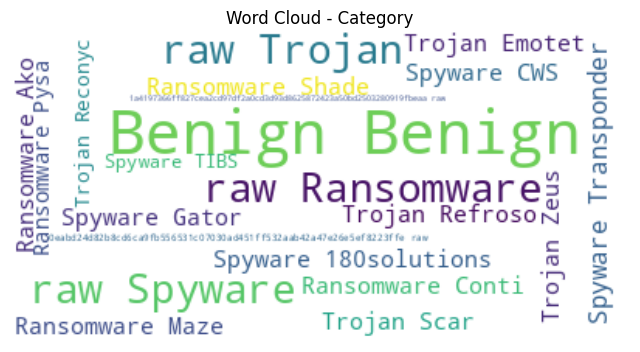

<ipython-input-32-1d053cf7870a>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


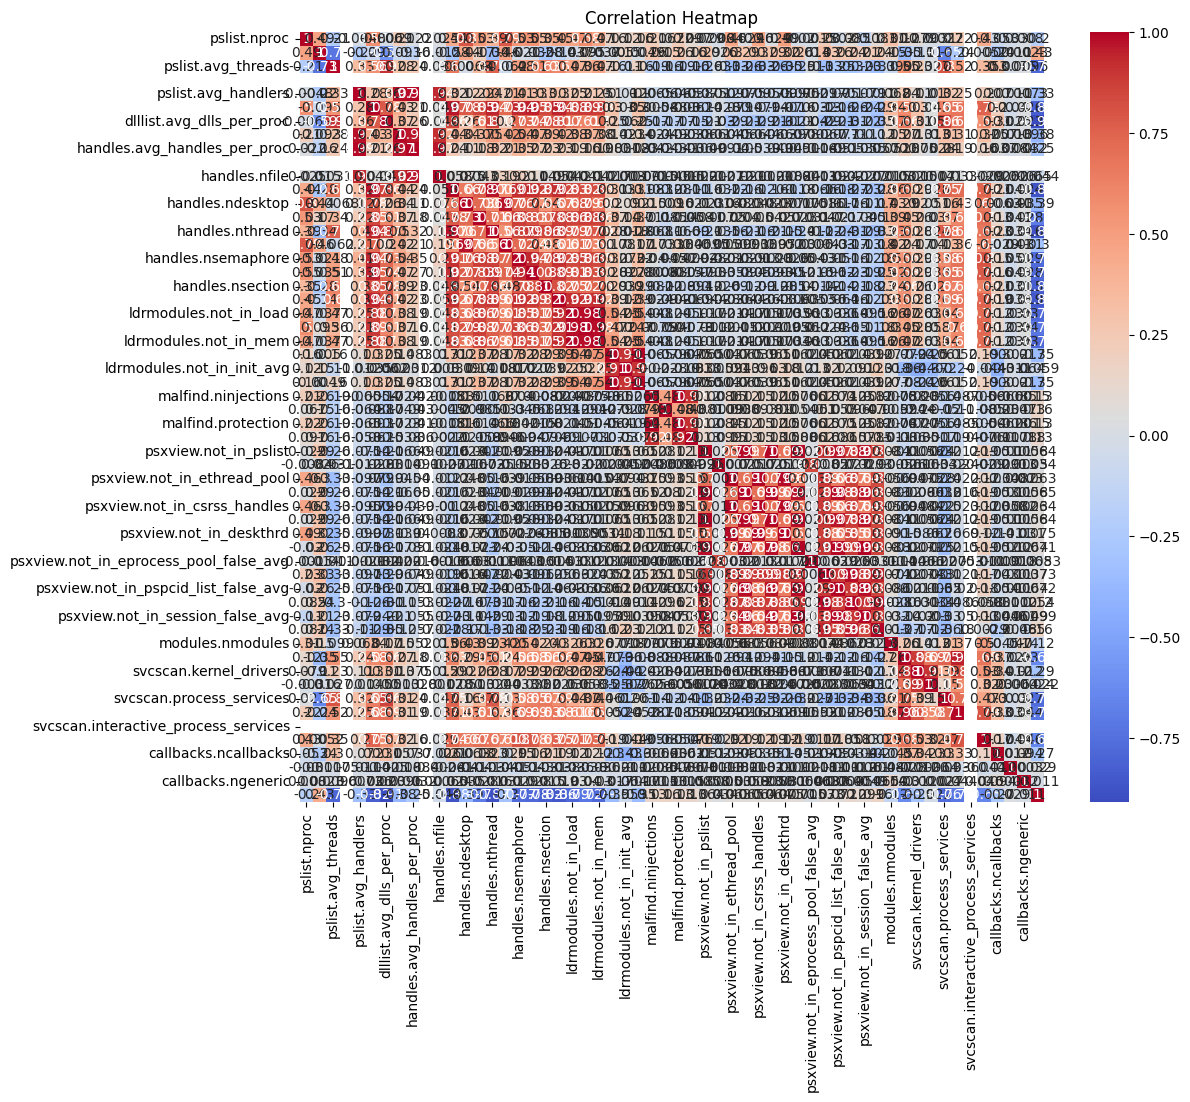

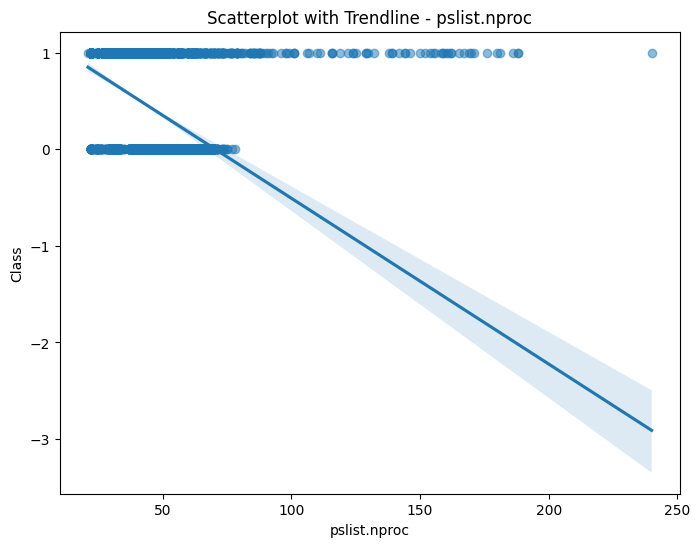

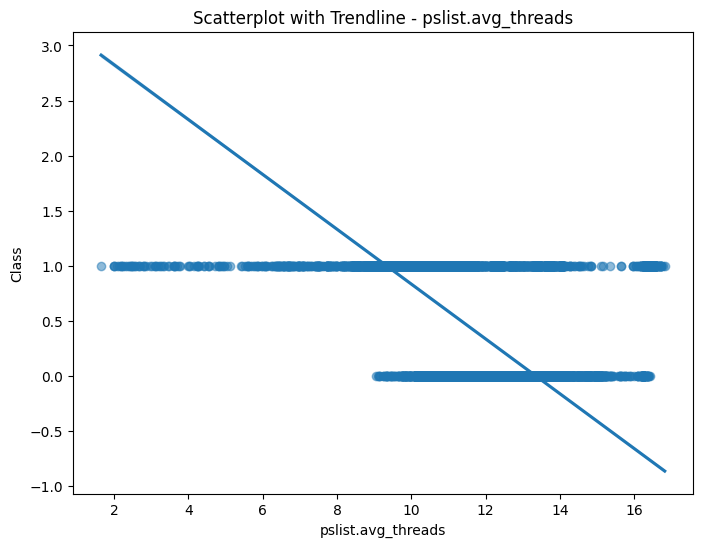

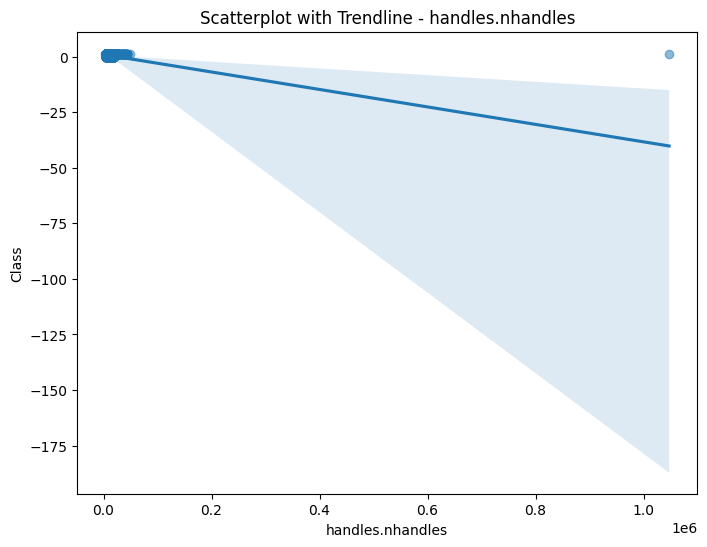

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('Obfuscated-MalMem2022.csv')

df['Class'] = df['Class'].astype('category').cat.codes

# Diagnostic Analytics for Text Data (Word Clouds)
text_columns = ['Category']
for column in text_columns:
    if df[column].notnull().any():  # Check if column contains at least one non-null value
        plt.figure(figsize=(8, 6))
        wordcloud = WordCloud(background_color='white').generate(' '.join(df[column].astype(str)))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - {column}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No data available for word cloud - {column}")

# Diagnostic Analytics for Numerical Data (Correlation Plot)
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Diagnostic Analytics for Numerical Data (Scatterplot with Trendline)
numerical_columns = ['pslist.nproc', 'pslist.avg_threads', 'handles.nhandles']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='Class', data=df, scatter_kws={'alpha': 0.5})
    plt.title(f'Scatterplot with Trendline - {column}')
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df['Category'] = df['Category'].astype('category').cat.codes

# Split the dataset into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report}")


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



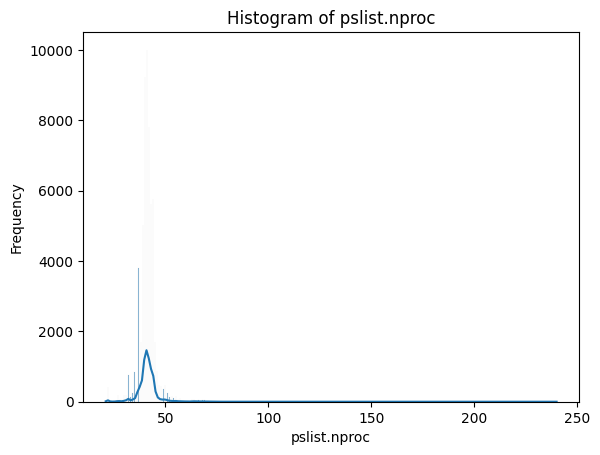

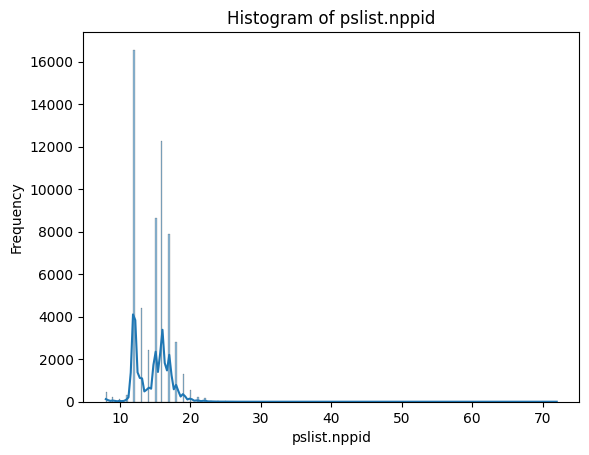

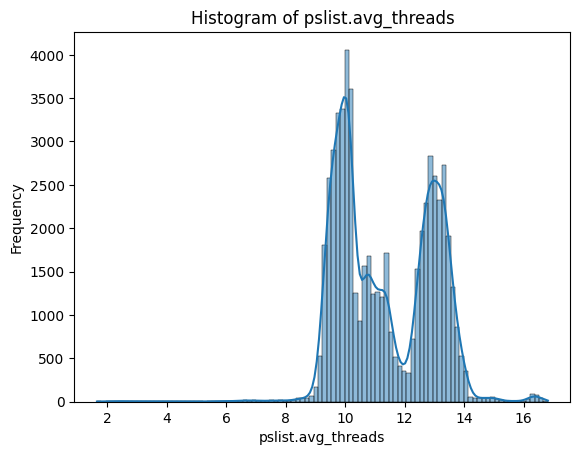

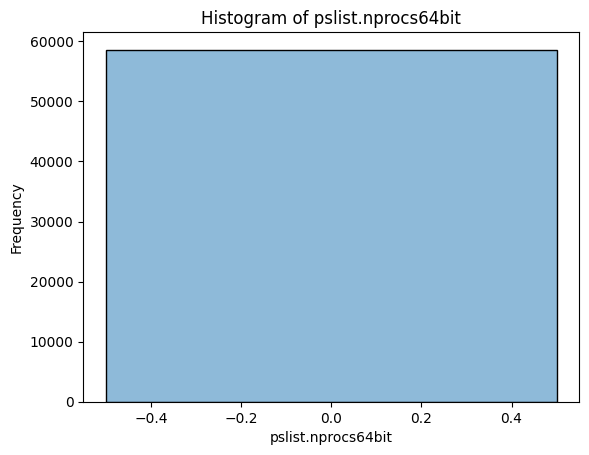

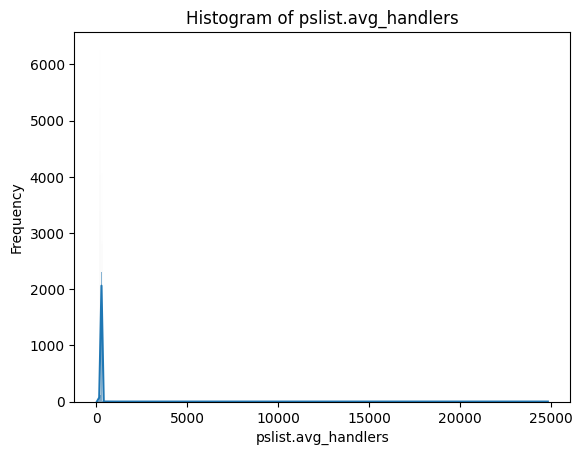

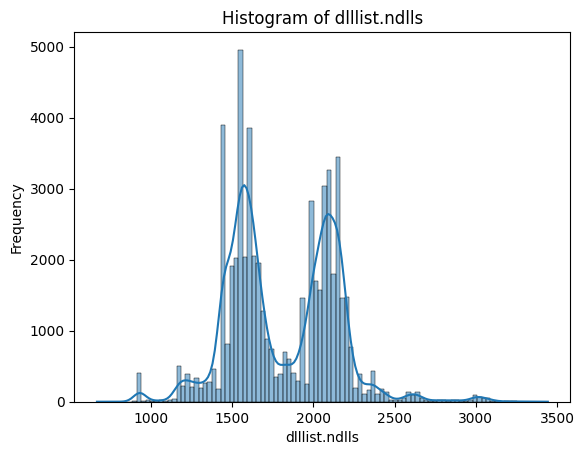

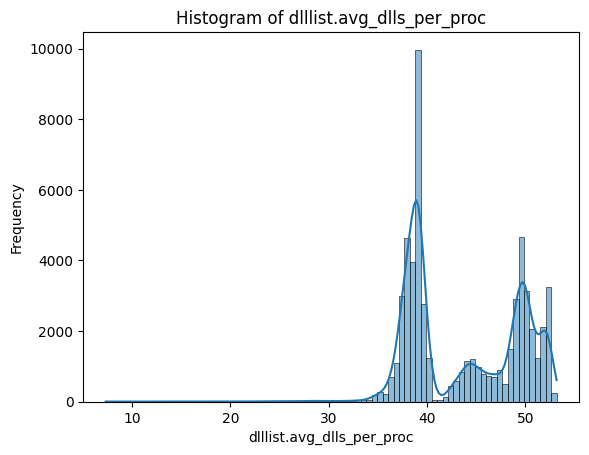

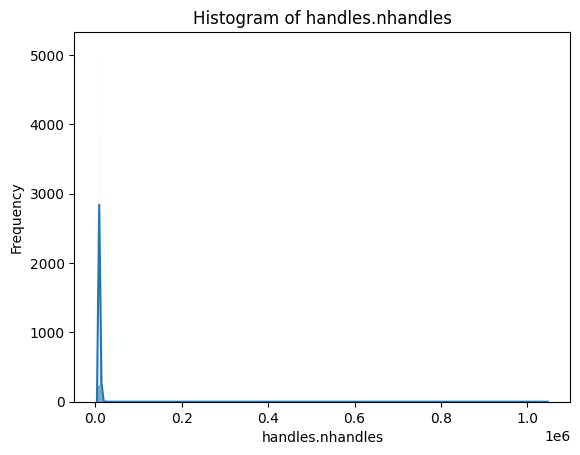

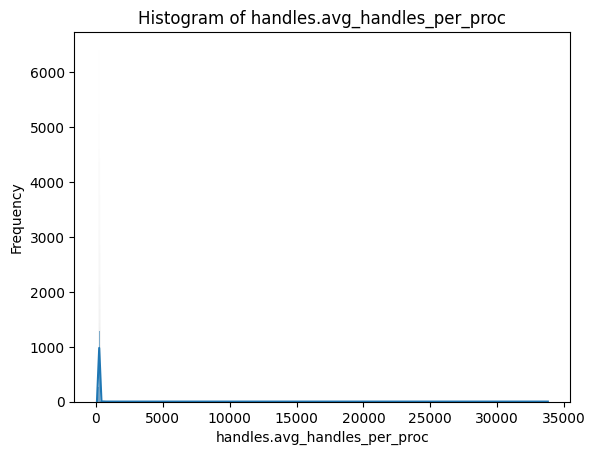

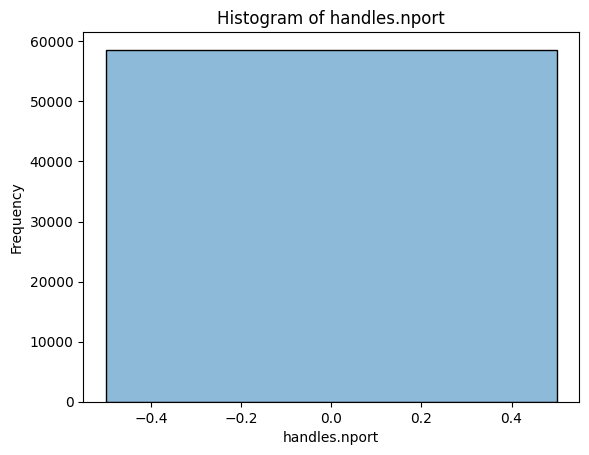

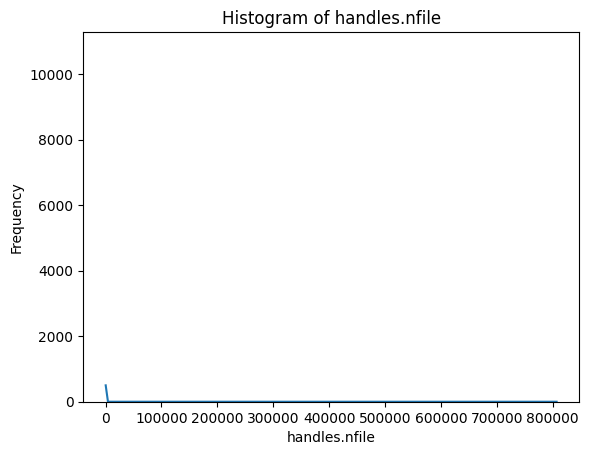

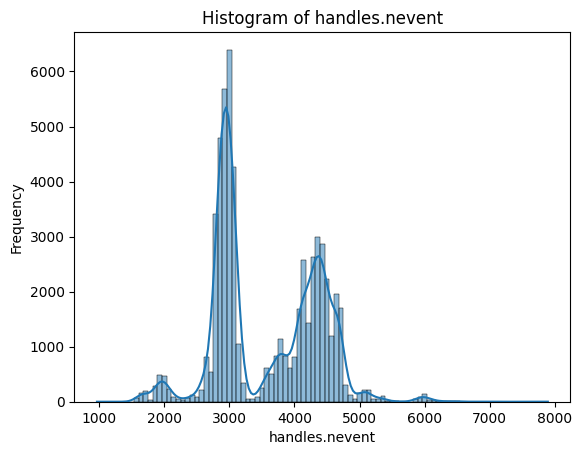

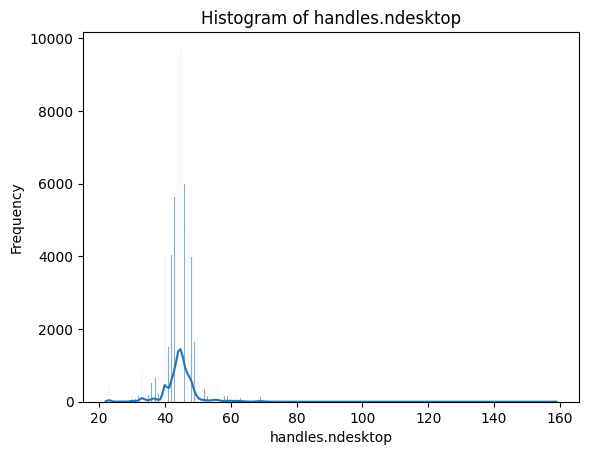

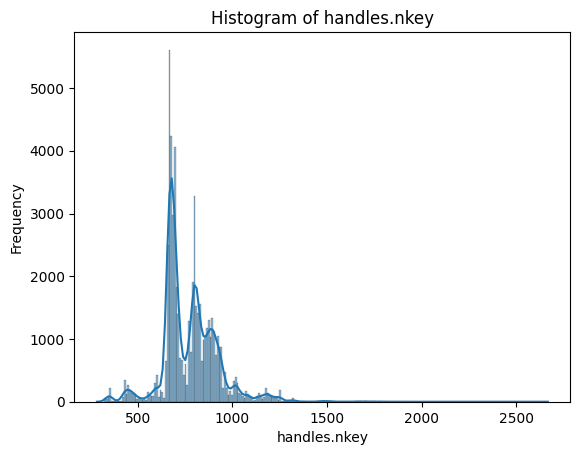

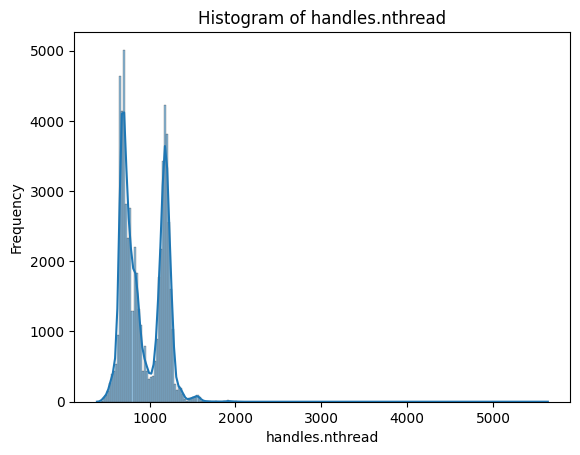

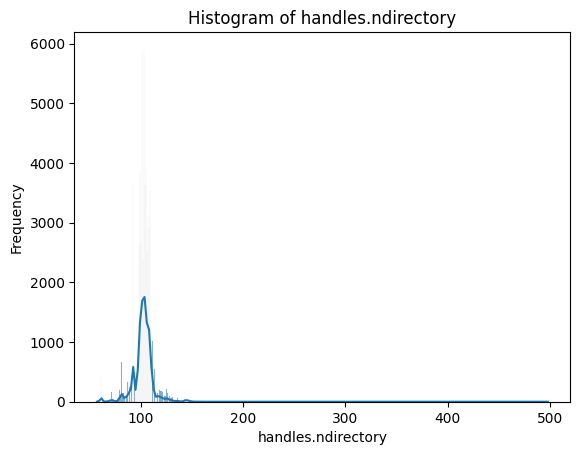

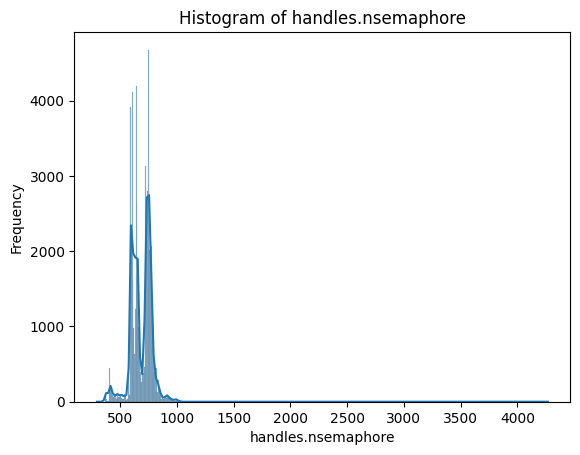

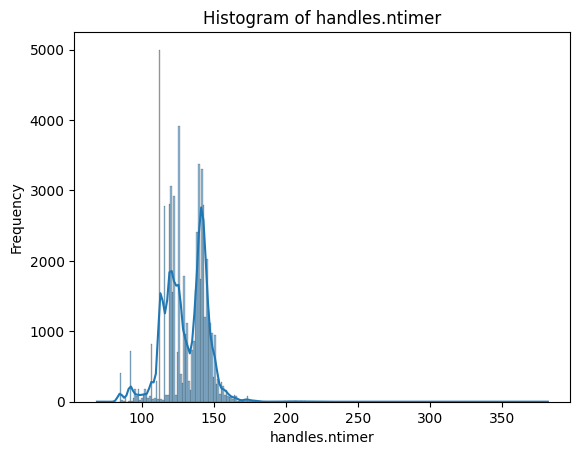

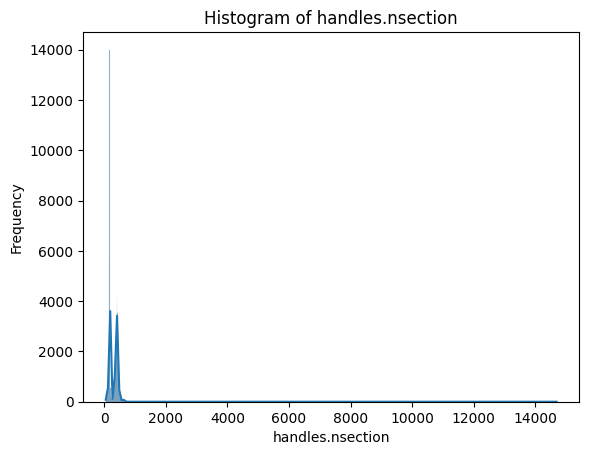

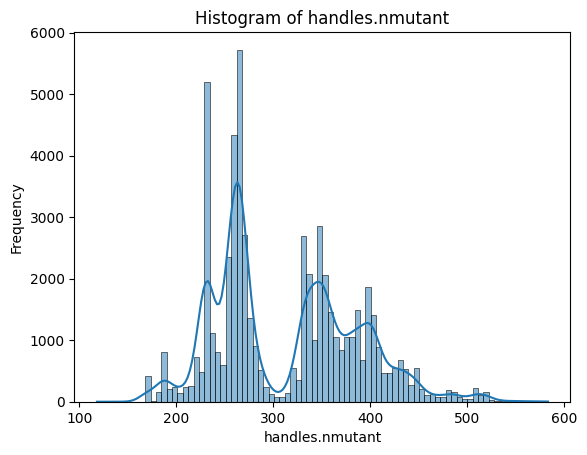

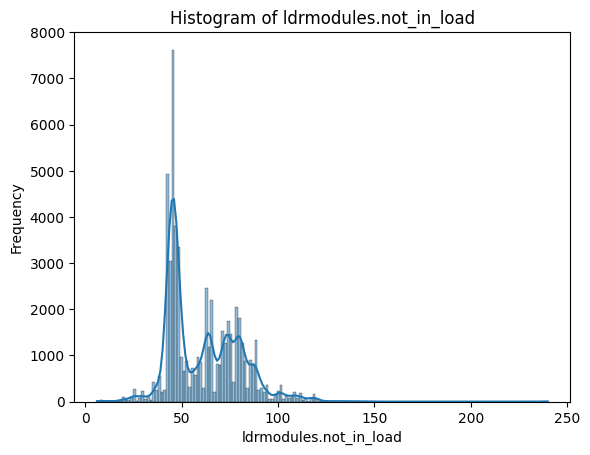

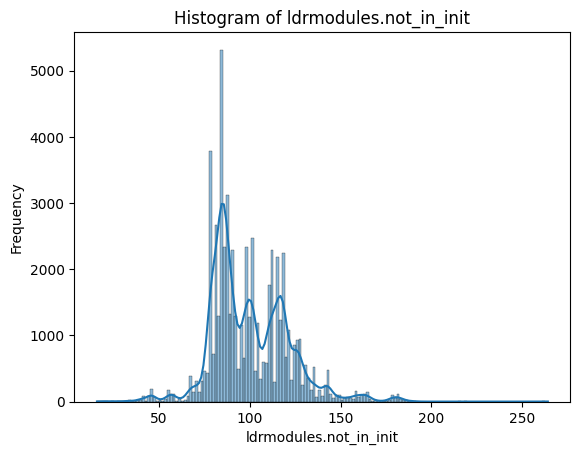

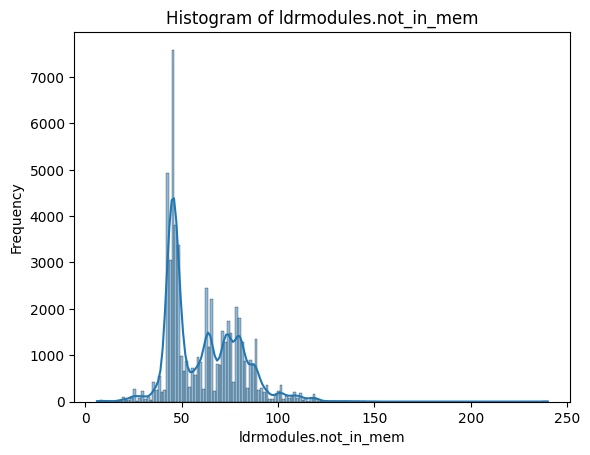

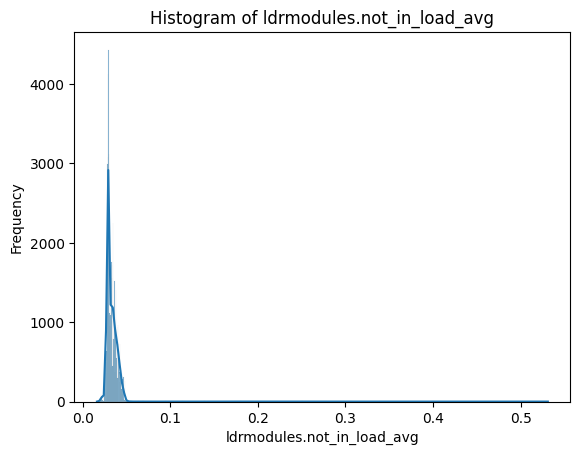

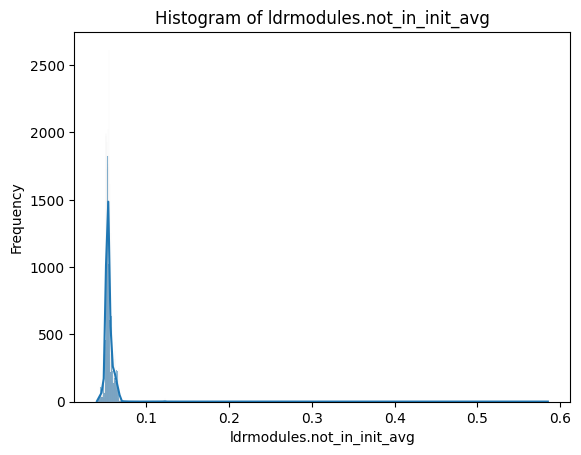

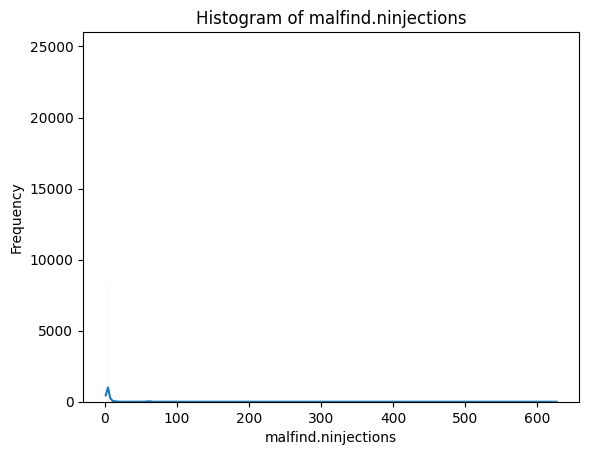

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fb2e3531000> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb2e3530280> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numeric_cols = df.drop("Class", axis=1).select_dtypes(include=[float, int])

# Histogram of all columns
for col in numeric_cols.columns:
    if col != "ldrmodules.not_in_mem_avg":
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

# Pair plots of all columns
sns.pairplot(df, hue="Class", diag_kind="hist")
plt.show()


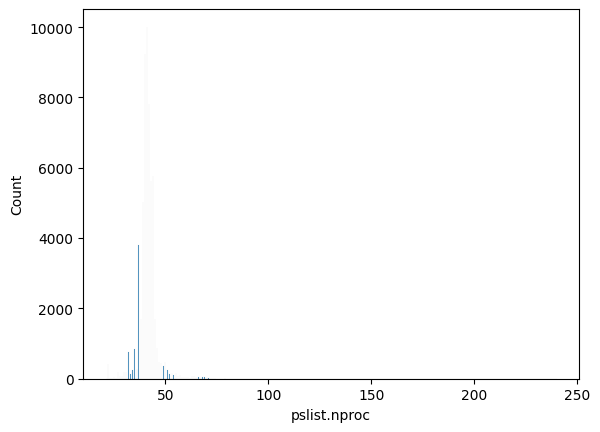

In [34]:
# Visualize the distribution of each feature
sns.histplot(df["pslist.nproc"])
plt.show()
	

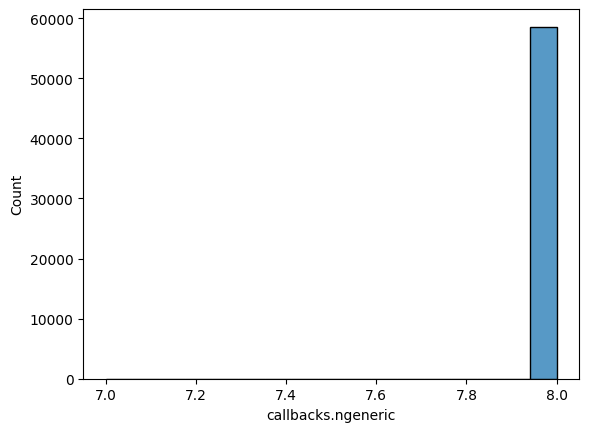

In [35]:
sns.histplot(df["callbacks.ngeneric"])
plt.show()

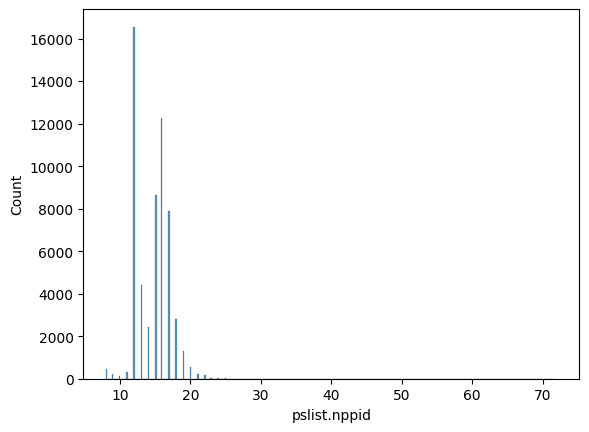

In [36]:
sns.histplot(df["pslist.nppid"])
plt.show()

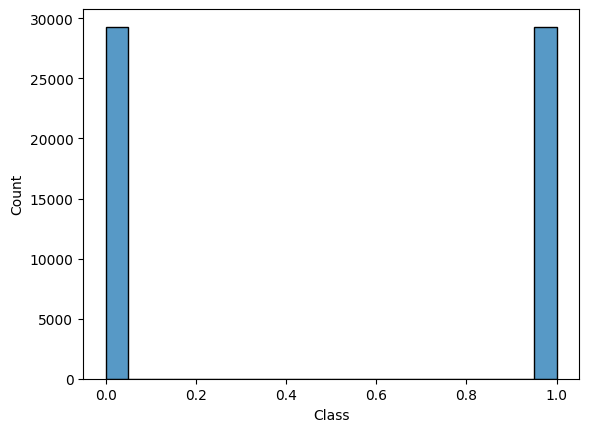

In [37]:
sns.histplot(df["Class"])
plt.show()

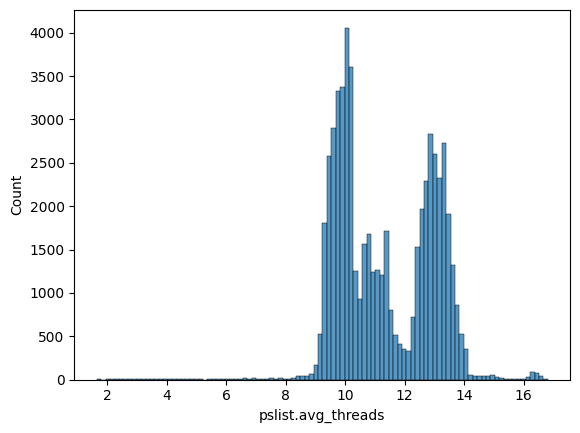

In [38]:
sns.histplot(df["pslist.avg_threads"])
plt.show()

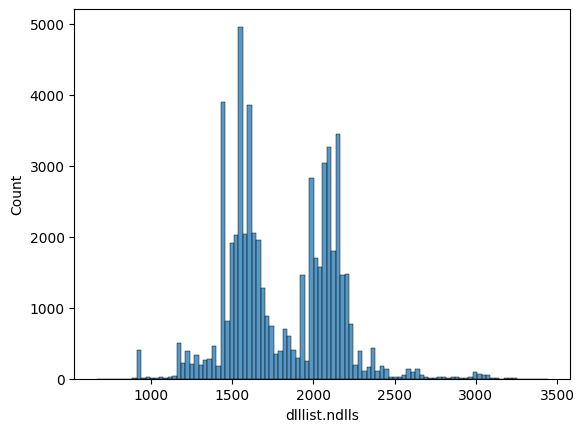

In [39]:
sns.histplot(df["dlllist.ndlls"])
plt.show()

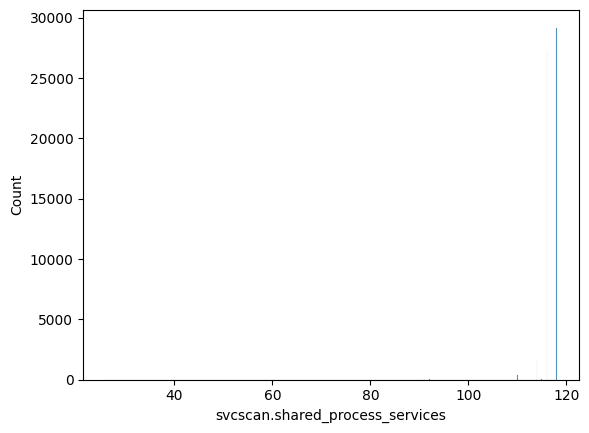

In [40]:
sns.histplot(df["svcscan.shared_process_services"])
plt.show()

## Top 5 Features Shown

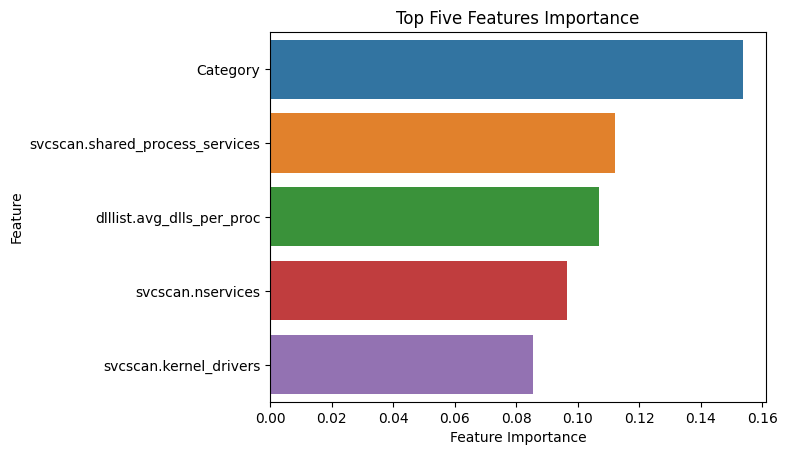

In [41]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

# Plot the top five features' importance
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(5))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top Five Features Importance")
plt.show()


In [42]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


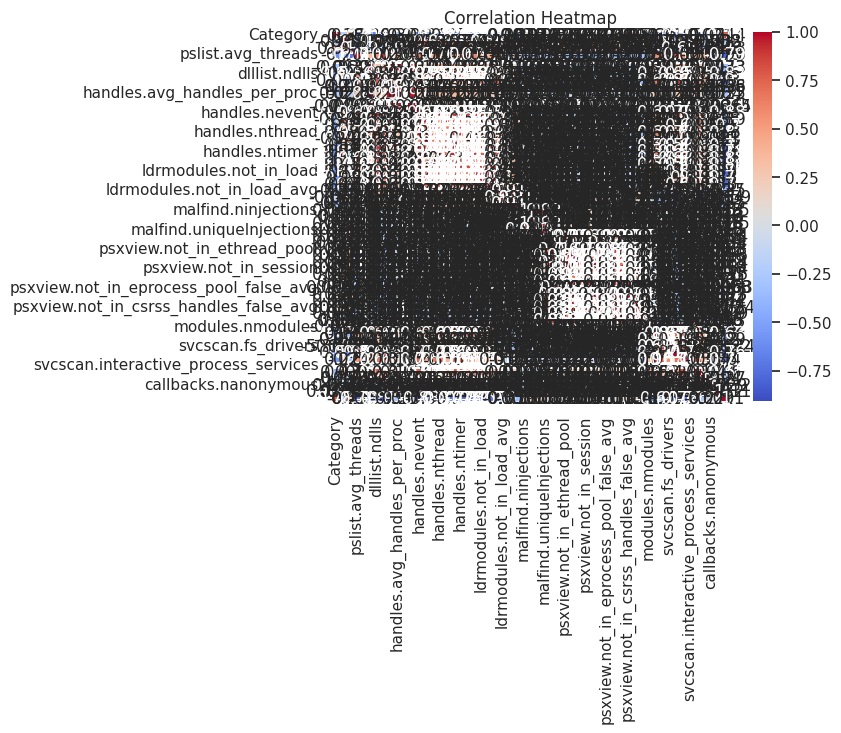

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

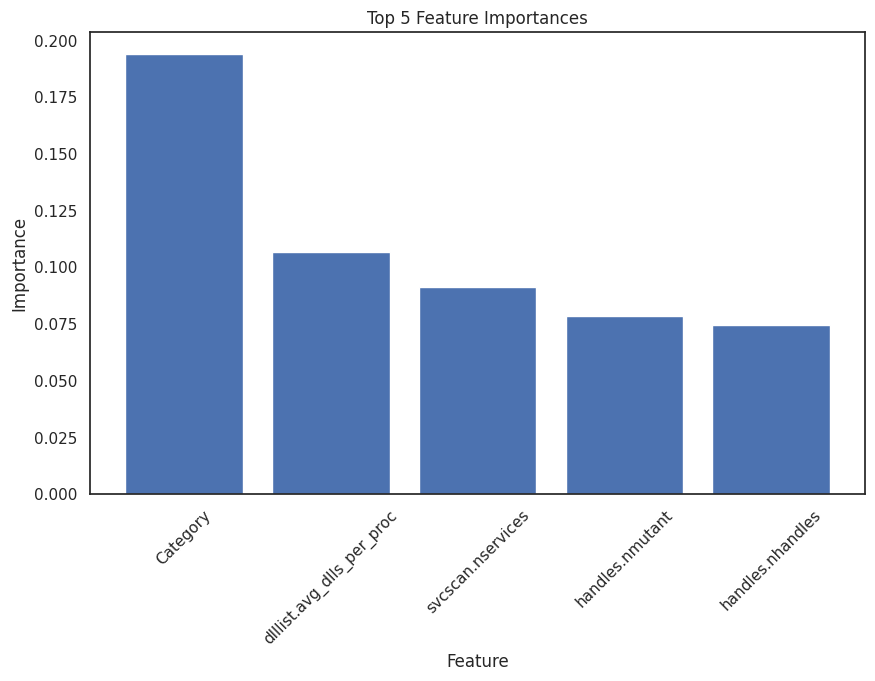

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



In [ ]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Calculate feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features[:5], importances[sorted_indices][:5])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 5 Feature Importances")
plt.xticks(rotation=45)
plt.show()

# Step 5: Classifier Building
# Train a random forest classifier on the entire dataset
rf_classifier_final = RandomForestClassifier()
rf_classifier_final.fit(X, y)

# Evaluate the classifier's performance on the testing data
y_pred = rf_classifier_final.predict(X_test)
print(classification_report(y_test, y_pred))



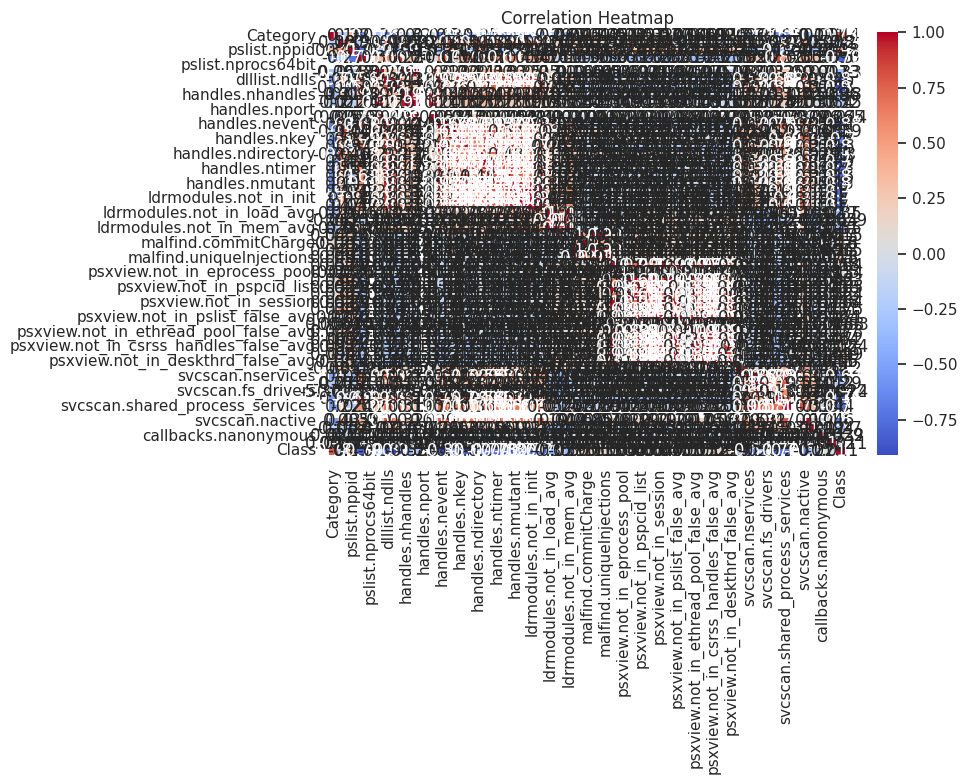

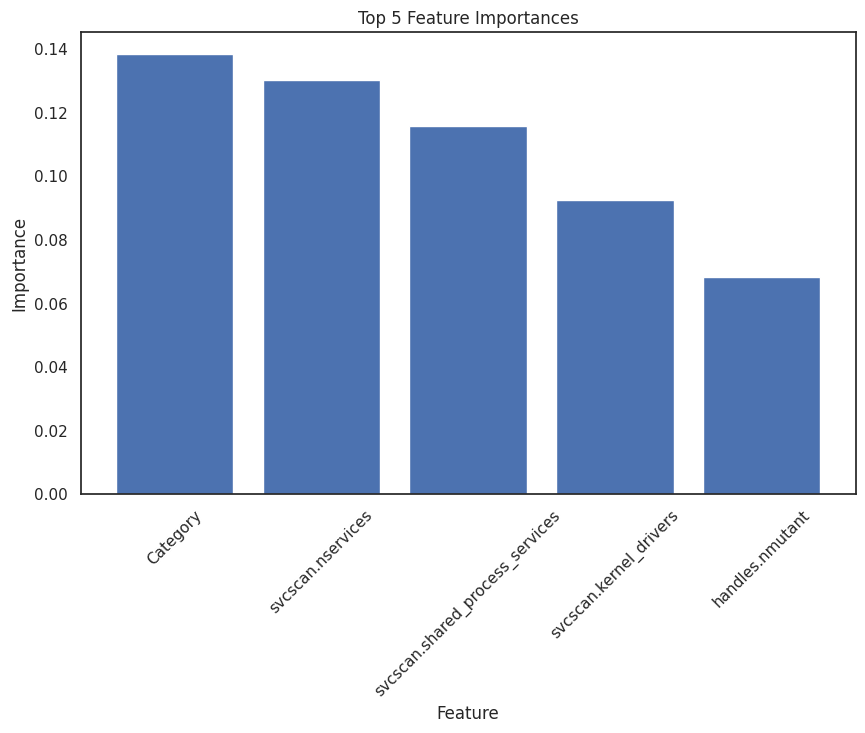

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 3: Diagnostic Analysis
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 4: Feature Importance
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features[:5], importances[sorted_indices][:5])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 5 Feature Importances")
plt.xticks(rotation=45)
plt.show()

# Step 5: Classifier Building
rf_classifier_final = RandomForestClassifier()
rf_classifier_final.fit(X, y)

y_pred = rf_classifier_final.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# New section

In [44]:
!jupyter nbconvert --to html BigData.ipynb


[NbConvertApp] Converting notebook BigData.ipynb to html
[NbConvertApp] Writing 8951276 bytes to BigData.html
